# OpenFoodFacts Dataset from kaggle 

https://www.kaggle.com/datasets/openfoodfacts/world-food-facts?resource=download


1. Cleaning the data
2. Perform basic EDA
3.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
openfood_df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')

openfood_df.info()

C:\Users\xavier\AppData\Local\Temp\ipykernel_2988\14680392.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  openfood_df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [3]:
openfood_df.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Cleaning the Data 

- Missing data/incomplete data --> fill/remove
- Incorrect data --> bad formating/inconsistency in units/bad formatting/typos
- Duplicates
- Outliers
- Text data
- Time-series data

### 1.a Remove all the unecessary/unusable columns

In [4]:
# (356027, 163)
openfood_df.shape

# containing x missing values: 44_183_489
openfood_df.isnull().sum().sum()

44183489

In [5]:
# First drop all columns that have only NaN inside
openfood_df.dropna(how='all', axis=1, inplace=True)
openfood_df.shape  # (356027, 147) --> 16 columns dropped

(356027, 147)

In [6]:
# Now lets check the % of NaN inside each column and delete the ones that have more than 50% of missing vals

vals_nan = openfood_df.isnull().sum()/ len(openfood_df)
# Looking at all cols with more than 50% of NaN
cols_nan = vals_nan[vals_nan > 0.50].index
cols_nan # we have 113 cols with more than 50%

Index(['generic_name', 'quantity', 'packaging', 'packaging_tags', 'categories',
       'categories_tags', 'categories_en', 'origins', 'origins_tags',
       'manufacturing_places',
       ...
       'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 'taurine_100g',
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g',
       'carbon-footprint_100g'],
      dtype='object', length=113)

In [7]:
# Lets drop those cols
openfood_df.drop(cols_nan, axis=1, inplace=True)
openfood_df.shape # (356027, 34)

(356027, 34)

In [8]:
openfood_df.isnull().mean().sort_values(ascending = False) # max 39% of missing vals which is a number I can work with

# To check:
# nutrition score - uk/fr/grade have the same %
# ingredient palm oil/additives/ingredient from palm oil - same
# countries_en/countries/countries_tags - same
# states/states_tags/states_en - same
# brand and brand_tags
# url and code

serving_size                               0.391560
fiber_100g                                 0.380151
nutrition-score-uk_100g                    0.284167
nutrition-score-fr_100g                    0.284167
nutrition_grade_fr                         0.284167
saturated-fat_100g                         0.258980
sugars_100g                                0.215829
carbohydrates_100g                         0.215734
fat_100g                                   0.214956
additives                                  0.202799
ingredients_that_may_be_from_palm_oil_n    0.202681
additives_n                                0.202681
ingredients_from_palm_oil_n                0.202681
ingredients_text                           0.202608
sodium_100g                                0.186315
salt_100g                                  0.186188
proteins_100g                              0.173768
energy_100g                                0.170380
brands_tags                                0.081651
brands      

In [9]:
openfood_df[['nutrition-score-uk_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr']]
openfood_df['nutrition-score-uk_100g'].equals(openfood_df['nutrition-score-fr_100g']) # are not the same ?


def compare_vals_cols(list_col, df):
    diff_rows_index = []
    sub_df = df[list_col]
    count_cols = 0
    for i, vals in enumerate(sub_df.values):
        if vals[0] != vals[1]:
            if np.count_nonzero(np.isnan(vals)) == vals.shape[0]:
                continue        
            diff_rows_index.append(i)
            count_cols += 1
    print(f'there are {count_cols} different values in the cols')
    print(sub_df.iloc[diff_rows_index].head(20))
    
compare_vals_cols(['nutrition-score-uk_100g', 'nutrition-score-fr_100g'], openfood_df)

# --> SO, most of the diff are NaN but there are still 13063 vals that are diff so i'll keep both

there are 13063 different values in the cols
      nutrition-score-uk_100g  nutrition-score-fr_100g
185                       3.0                     18.0
190                       0.0                      2.0
231                       2.0                     13.0
238                       2.0                     14.0
249                       2.0                     13.0
574                       1.0                     11.0
636                       0.0                      1.0
682                      20.0                     11.0
698                       2.0                     17.0
699                       1.0                     12.0
719                      20.0                     15.0
733                      19.0                     14.0
930                       0.0                      6.0
1665                      1.0                     10.0
1666                      1.0                     10.0
2102                     -3.0                      5.0
3476                

In [10]:
openfood_df[['ingredients_that_may_be_from_palm_oil_n', 'additives_n', 'ingredients_from_palm_oil_n']].head(30) # additive is diff lets compare the two others

compare_vals_cols(['ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n'], openfood_df)
# 17527 vals different so i'll keep both!

there are 17527 different values in the cols
     ingredients_that_may_be_from_palm_oil_n  ingredients_from_palm_oil_n
48                                       3.0                          0.0
177                                      1.0                          0.0
205                                      1.0                          0.0
209                                      1.0                          0.0
214                                      1.0                          0.0
215                                      1.0                          0.0
216                                      1.0                          0.0
218                                      1.0                          0.0
251                                      1.0                          0.0
265                                      1.0                          0.0
266                                      1.0                          0.0
288                                      1.0                       

In [11]:
openfood_df[['countries_en', 'countries', 'countries_tags']]

# these are the same so I'll keep countries_en which is the most clear
# lets create a list of cols to drop 
cols_todrop = ['countries', 'countries_tags']

In [12]:
openfood_df[['states', 'states_tags', 'states_en']]
# The states are describing the state of the product in the dataset, which isnt usefull so i'll remove all 3
cols_todrop.extend(('states', 'states_tags', 'states_en'))

In [13]:
# check if url, code and creator are necessary cols
openfood_df[['url', 'code', 'creator']] # dont think so
cols_todrop.extend(('url', 'code', 'creator'))

In [14]:
openfood_df[['brands_tags', 'brands']] # same
cols_todrop.append('brands')

In [15]:
# check the created t cols
openfood_df[['created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime']]
# the most revelant seem to be the created_datetime, lets keep this one
cols_todrop.extend(('created_t', 'last_modified_datetime', 'last_modified_t'))

In [16]:
# lets drop the columns
openfood_df.drop(cols_todrop, axis=1, inplace=True)
openfood_df.shape # (356027, 22)

(356027, 22)

### 1.b fill/remove missing values

Now that I have cleaned the useless and reductant columns, i'm going to start looking at the rows and missing vals to see if I remove or fill them

In [17]:
openfood_df.head(5)
openfood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 22 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   created_datetime                         356017 non-null  object 
 1   product_name                             338515 non-null  object 
 2   brands_tags                              326957 non-null  object 
 3   countries_en                             355752 non-null  object 
 4   ingredients_text                         283893 non-null  object 
 5   serving_size                             216621 non-null  object 
 6   additives_n                              283867 non-null  float64
 7   additives                                283825 non-null  object 
 8   ingredients_from_palm_oil_n              283867 non-null  float64
 9   ingredients_that_may_be_from_palm_oil_n  283867 non-null  float64
 10  nutrition_grade_fr              

In [18]:
# as the product name is the most important for the following analysis i'm going to check first if all have
openfood_df[['product_name']].isnull().sum()
# 17512 don't have a name, lets drop them

openfood_df.dropna(subset=['product_name'], inplace=True)
openfood_df.shape #(338515, 22)

(338515, 22)

In [19]:
openfood_df.isnull().sum().sort_values(ascending=True)

product_name                                    0
created_datetime                               10
countries_en                                  219
brands_tags                                 13893
energy_100g                                 46534
proteins_100g                               47698
salt_100g                                   51809
sodium_100g                                 51846
ingredients_text                            56418
additives_n                                 56444
ingredients_that_may_be_from_palm_oil_n     56444
ingredients_from_palm_oil_n                 56444
additives                                   56483
fat_100g                                    62359
sugars_100g                                 62424
carbohydrates_100g                          62644
saturated-fat_100g                          77644
nutrition_grade_fr                          86445
nutrition-score-fr_100g                     86445
nutrition-score-uk_100g                     86445


In [20]:
# fill the created_datetime NaN
openfood_df['created_datetime'].fillna(method='ffill', inplace=True)

In [21]:
# replacing for countries
openfood_df['countries_en'].head(10)
openfood_df.loc[openfood_df['countries_en'].isnull(), 'countries_en']
openfood_df.loc[10694:10695, 'countries_en']
openfood_df['countries_en'].fillna(value='country not available', inplace=True)

In [22]:
# fill tags
openfood_df['brands_tags'].head(10) # looks the same as the countries, i'm going to fill with not available
openfood_df['brands_tags'].fillna(value='tag not available', inplace=True)

In [23]:
# fill energy_100g/proteins_100g/ salt_100g/ sodium_100g
# those have almost the same number of Nan, I want to remove tthe rows that are all nan is those cols
openfood_df.dropna(subset=['energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'], how='all', axis=0, inplace=True) # 45586 rows were all nan (292929, 23)
openfood_df.dropna(subset=['sugars_100g', 'carbohydrates_100g', 'fat_100g'], how='all', axis=0, inplace=True) # (292320, 23) - 609 rows
openfood_df.shape # (292320, 22)

(292320, 22)

In [24]:
# I can see that it is going to be really difficult to fill any values for the energy, salt, sugar, etc rows because it could be inconsistent and false the results after, 
# I am going to remove all vals that have Nan in those cols
openfood_df.dropna(subset=['energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'sugars_100g', 'carbohydrates_100g', 'fat_100g'], inplace=True)
openfood_df.shape # (257375, 22) - 34945 rows

(257375, 22)

In [25]:
# I have the same number of Nan for the ingredients_that_may_be_from_palm_oil_n/additives_n/ingredients_text/ingredients_from_palm_oil_n, lets see whats going on
openfood_df[['ingredients_that_may_be_from_palm_oil_n', 'additives_n', 'ingredients_text', 'ingredients_from_palm_oil_n']]
# replace with the median - more robust 
#openfood_df[['ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n']] = openfood_df[['ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n']].fillna(value=openfood_df[['ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n']].median(), inplace=True)

openfood_df['ingredients_that_may_be_from_palm_oil_n'].fillna(value=openfood_df['ingredients_that_may_be_from_palm_oil_n'].median(), inplace=True)
openfood_df['ingredients_from_palm_oil_n'].fillna(value=openfood_df['ingredients_from_palm_oil_n'].median(), inplace=True)
openfood_df['additives_n'].fillna(value=openfood_df['additives_n'].median(), inplace=True)
# replace ingredient text missing value with 'unknow'
openfood_df['ingredients_text'].fillna(value='unknow', inplace=True)
openfood_df['additives'].fillna(value='unknow', inplace=True)


In [26]:
# I am going to drop all the nan in the saturated-fat_100g, I have tried to predict them with a linear model but the R2 score was just above 50% so i don't want to fill
# the column with wrong values
# as I see there are a lot of nan in the serving_size column and we have the value for the food for 100g, the serving size may not be relevant here 
# so i will drop it

openfood_df.dropna(subset=['saturated-fat_100g', 'nutrition_grade_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'], inplace=True)
openfood_df.drop('serving_size', axis=1, inplace=True)
openfood_df.shape # (236738, 21) - 20637 rows

(235776, 21)

In [27]:
openfood_df.isnull().sum()  # so removing the fiber_100g missing value will get me 200_000 rows to work with which is fair for the rest of the work 
# I tried to see if i could do otherwise but replacing 40_000 rows with the median don't seem like a great idea
# I am going to drop them
openfood_df.dropna(subset=['fiber_100g'], inplace=True)
openfood_df.shape # (195141, 21)

(195141, 21)

### 1.c Duplicates

In [28]:
# lets start with duplicates
openfood_df.duplicated().sum() # 506 rows are similar, lets drop them
openfood_df.drop_duplicates(inplace=True)

In [29]:
openfood_df.columns

Index(['created_datetime', 'product_name', 'brands_tags', 'countries_en',
       'ingredients_text', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

In [30]:
openfood_df.duplicated(['product_name', 'brands_tags', 'countries_en',
       'ingredients_text', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']).sum() # 1814

# lets class them in date to keep the last ones
openfood_df['created_datetime'] = pd.to_datetime(openfood_df['created_datetime']) # convert to date to sort them
openfood_df.sort_values(by=['created_datetime'], inplace=True)
openfood_df.drop_duplicates(['product_name', 'brands_tags', 'countries_en',
       'ingredients_text', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'], keep='last', inplace=True)

In [31]:
# I want to check if the same product are duplicated but with different ingredient text and additive etc 
# I think that the formating of those is slightly different but that its still the same products 

duplicates_ingr = openfood_df.loc[openfood_df.duplicated(['product_name', 'brands_tags', 'countries_en',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition_grade_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g',
       'sodium_100g'], keep=False), :].copy()

In [32]:
# Indeed there are products that are the same but with slighly different ingredient text
duplicates_ingr[(duplicates_ingr.product_name== 'Couscous grains moyens') & (duplicates_ingr.brands_tags== 'cora')]

# I will remove ingredient text, additive etc to remove all the wrongly labeled duplicates 
openfood_df.drop_duplicates(['product_name', 'brands_tags', 'countries_en', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition_grade_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'], 
                            keep='last', inplace=True)
openfood_df.shape # (190128, 21) - 2693 rows

(190128, 21)

In [33]:
openfood_df.info()

dict_dtypes = {'additives_n':'int64',
              'ingredients_from_palm_oil_n':'int32',
              'ingredients_that_may_be_from_palm_oil_n':'int32', 
              'nutrition-score-fr_100g': 'int64', 
              'nutrition-score-uk_100g': 'int64'}

openfood_df= openfood_df.astype(dict_dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190128 entries, 193716 to 321357
Data columns (total 21 columns):
 #   Column                                   Non-Null Count   Dtype              
---  ------                                   --------------   -----              
 0   created_datetime                         190128 non-null  datetime64[ns, UTC]
 1   product_name                             190128 non-null  object             
 2   brands_tags                              190128 non-null  object             
 3   countries_en                             190128 non-null  object             
 4   ingredients_text                         190128 non-null  object             
 5   additives_n                              190128 non-null  float64            
 6   additives                                190128 non-null  object             
 7   ingredients_from_palm_oil_n              190128 non-null  float64            
 8   ingredients_that_may_be_from_palm_oil_n  190128 n

### 1.d Detecting and filtering outliers

 - lets established what is a 'normal' value
     - description of each feature 
     - plotting of each feature
 - find a way to measure deviations from that 'normal'
      - with Z score or with a X number of time more than the stddev

In [34]:
# lets start by creating a sub df with the cols with outliers 
include_cols =['float', 'int']
list_cols_check = openfood_df.select_dtypes(include_cols).columns.to_list()

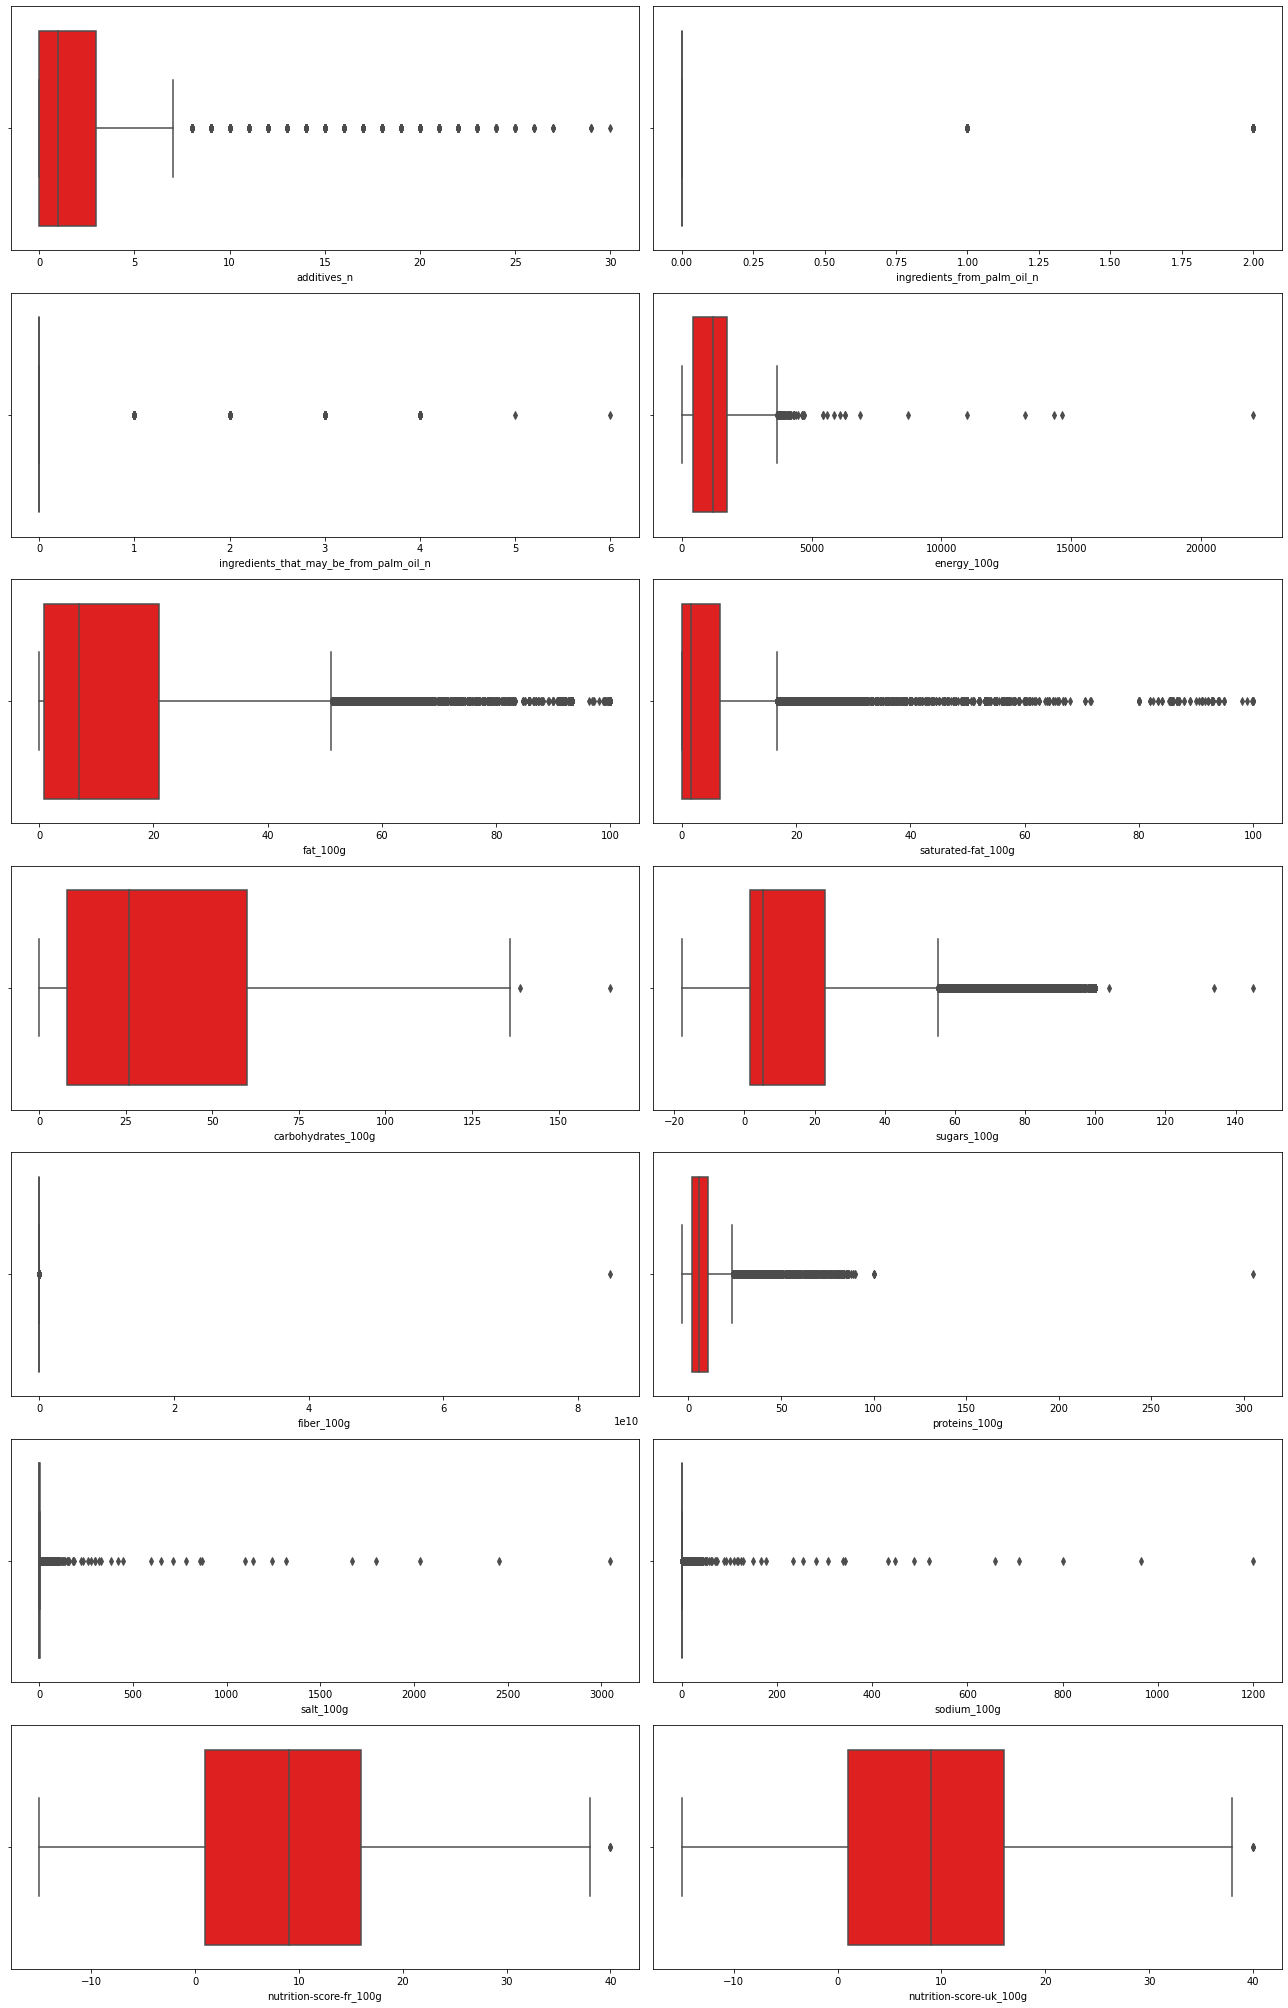

In [35]:
fig,axes = plt.subplots(nrows=7,ncols=2,figsize=(18,7*4))

for col, ax in zip(list_cols_check, axes.ravel()):
    sns.boxplot(x= openfood_df[col], color='red', ax=ax)

plt.tight_layout()

# 1. there are incorrect values (more than 100 for 100g is incorrect, or negative vals) so i am going to start by removing those 
# 2. energy is actually in kJ so i'll need to find a coherent way to handle that
# 3. I'll need to see if 3x the stddev is not reomving too much rows since i guess some ingredients with extreme values are still relevant to the steps after

In [36]:
# 1. incorrect values

filter_ = ((openfood_df[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g','proteins_100g', 'salt_100g', 'sodium_100g']] > 100) | (openfood_df[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g','proteins_100g', 'salt_100g', 'sodium_100g']] < 0))
filter_ = filter_.any(axis=1)
outliers = openfood_df.loc[filter_, ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g','proteins_100g', 'salt_100g', 'sodium_100g']]
outliers
openfood_df = openfood_df.drop(outliers.index, axis=0)
openfood_df.shape # (190054, 21) - 74 rows

(190054, 21)

In [37]:
# 2. lets take a closer look at energy

filter_kj = openfood_df.energy_100g > 5_000 # before 5000 kj there are the oil and butter which make sense so i'll remove from 5000
outliers = openfood_df.loc[filter_kj, :]
openfood_df.drop(outliers.index, axis=0, inplace=True)
openfood_df.shape # (190040, 21)

(190040, 21)

In [38]:
# 3. now lets see if i can remove outliers everywhere else

# I already know that additives_n/ingredient from palm oil are fine
list_cols_check.remove('additives_n')
list_cols_check.remove('ingredients_from_palm_oil_n')
list_cols_check.remove('ingredients_that_may_be_from_palm_oil_n')

# sodium and salt look similar --> there are the same indeed, lets drop sodium
openfood_df.drop('sodium_100g', axis=1, inplace=True)
list_cols_check.remove('sodium_100g')

# possible to have negative score in nutrition score ?
# yes it is! https://www.colruytgroup.com/en/conscious-consuming/nutri-score
list_cols_check.remove('nutrition-score-fr_100g')
list_cols_check.remove('nutrition-score-uk_100g')

In [39]:
# 3.b now the rest 

openfood_df[list_cols_check].describe().T

,count,mean,std,min,25%,50%,75%,max
energy_100g,190040.0,1181.014380,758.560910,0.0,448.00,1197.000,1732.00000,4707.0
fat_100g,190040.0,12.960517,15.776203,0.0,0.88,6.980,21.00000,100.0
saturated-fat_100g,190040.0,4.610547,7.050416,0.0,0.00,1.650,6.67000,100.0
carbohydrates_100g,190040.0,34.131769,28.094615,0.0,7.93,25.995,60.00000,100.0
sugars_100g,190040.0,14.761349,19.248094,0.0,1.47,5.200,22.99250,100.0
fiber_100g,190040.0,2.878551,4.494651,0.0,0.00,1.600,3.60000,100.0
proteins_100g,190040.0,7.693913,8.012350,0.0,2.00,5.700,10.71000,100.0
salt_100g,190040.0,1.216631,3.946101,0.0,0.10,0.635,1.31572,100.0


In [40]:
zscores_df = (openfood_df[list_cols_check] - openfood_df[list_cols_check].mean()) / (openfood_df[list_cols_check].std())
zscores_df = np.abs(zscores_df) > 5  # There are 13989 rows outside of the 3x stddev which is about 7% of the data, i'll take 5x the stddev which makes 2%
zscores_df = zscores_df.any(axis=1)

outliers = openfood_df.loc[zscores_df, list_cols_check] # There are 13989 rows outside of the 3x stddev which is about 7% of the data
openfood_df.drop(outliers.index, axis=0, inplace=True)
openfood_df.shape #(186073, 20)

(186073, 20)

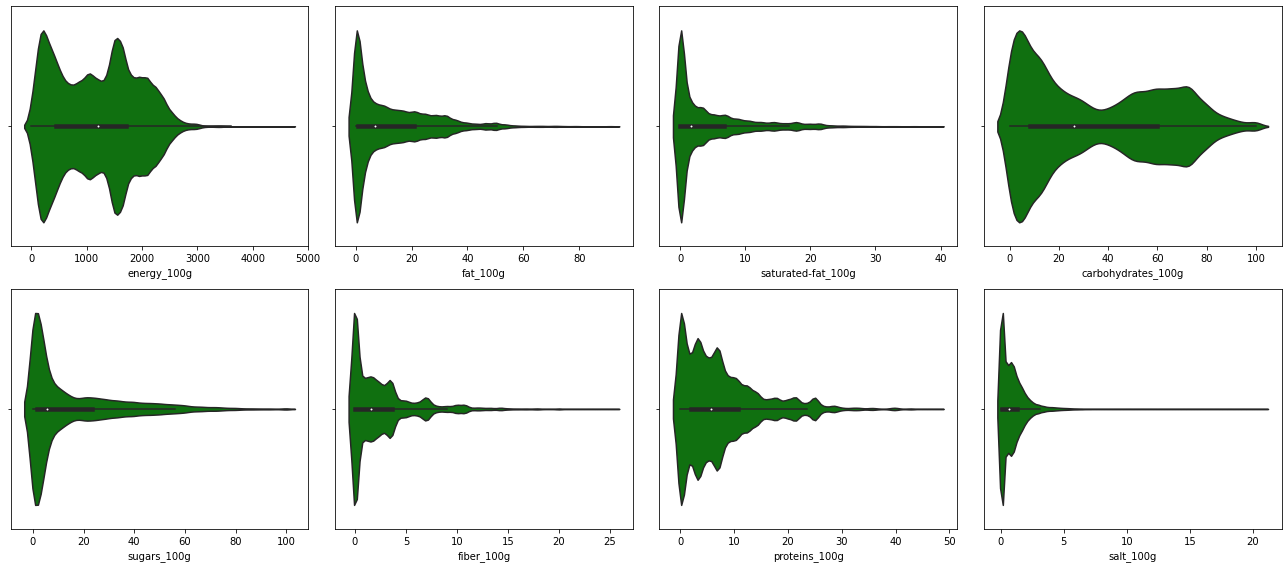

In [41]:
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(18,2*4))

for col, ax in zip(list_cols_check, axes.ravel()):
    sns.violinplot(x= openfood_df[col], color='green', ax=ax)

plt.tight_layout()

### 1.e Cleaning the text-data

In [42]:
include = 'object'
list_obj_check = openfood_df.select_dtypes(include).columns.to_list()
openfood_df[list_obj_check]

,product_name,brands_tags,countries_en,ingredients_text,additives,nutrition_grade_fr
193716,Jacquet Les bouchées créatives à garnir,jacquet,France,"Farine de blé, huile de tournesol, eau, sel, s...",[ farine-de-ble -> fr:farine-de-ble ] [ far...,c
222043,Boudoirs,cora,France,Sucre - farine de _blé_ - _œufs_ frais 25 % - ...,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,d
201869,Cookies tout chocolat Biocoop,biocoop,France,"pépites de chocolat* 30 % (pâte de cacao*, suc...",[ pepites-de-chocolat-30 -> fr:pepites-de-cho...,e
196094,Noisettes Entières,"milka,mondelez","France,Germany","Sucre, _Noisettes_ 20%, beurre de cacao, poudr...",[ sucre -> fr:sucre ] [ noisettes-20 -> fr:...,e
321122,SMACZNA ZUPA Grochova,"winiary,nestle",Poland,"mąka grochowa (63.6%), grzanki (9.5%) (mąka pr...",[ mąka-grochowa -> pl:mąka-grochowa ] [ 63-...,c
...,...,...,...,...,...,...
355732,Express Cup Fried Onion Chicken,mamee,France,"NOODLE flour, Palm oil, Modified sait StablTtz...",[ noodle-flour -> fr:noodle-flour ] [ noodl...,d
249132,Chocolat Caramel Et Sel De Saint-lu Mascarin,mascarin,France,"chocolat au lait (cacao 33% minimum) : sucre, ...",[ chocolat-au-lait -> fr:chocolat-au-lait ] ...,e
328676,Alpen milch,"milka,mondelez",Serbia,"Šećer, kakao maslac, obrano _mleko_ u prahu, k...",[ šećer -> sr:šećer ] [ kakao-maslac -> sr:...,e
300814,Drink Me Chai - Spiced Chai,drink-me,France,"Sugar, Skimmed Milk Powder (1 9%), Coconut Oil...",[ sugar -> fr:sugar ] [ skimmed-milk-powder...,e


In [43]:
# lets lower the countries
openfood_df.product_name = openfood_df.product_name.str.lower()
openfood_df.brands_tags = openfood_df.brands_tags.str.lower()
openfood_df.countries_en = openfood_df.countries_en.str.lower()
openfood_df['nutrition_grade_fr'].value_counts() # all lower case so all good
openfood_df.ingredients_text = openfood_df.ingredients_text.str.lower()

In [44]:
additives = openfood_df['additives']
# lets extract the language use in case I want to translate 
openfood_df['language_ingredients'] = additives.str.extract('->\s(\w\w*?):')
openfood_df['additives'] = additives.str.findall(':(\w+-*\w*-*\w*-*\w*-*\w*-*\w*)')

In [45]:
# finally lets drop the index and save the new clean dataset!
openfood_df.reset_index(drop=True, inplace=True)
openfood_df.to_csv("FoodFactCleaned.csv", encoding = 'utf-8', index=False)

In [46]:
### I am going to try to clean and translate the ingredient, as it is need all the space available i will delete all other var in the env
%reset -f

In [47]:
# !pip3 install googletrans==3.1.0a0
# !pip3 install tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import googletrans
from googletrans import Translator, constants
import statistics
from statistics import mode
from tqdm import tqdm
import httpx

openfood_df = pd.read_csv('FoodFactCleaned.csv')

In [48]:
# after the first try, i was reminded that some ingredient have the 'unknow' val that translated into nan in the language
openfood_df['language_ingredients'].fillna(value='unknow', inplace=True)

In [49]:
openfood_df.loc[openfood_df['language_ingredients'] != 'en', :].head(10)

,created_datetime,product_name,brands_tags,countries_en,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,language_ingredients
0,2012-02-09 10:34:56+00:00,jacquet les bouchées créatives à garnir,jacquet,france,"farine de blé, huile de tournesol, eau, sel, s...",1,"['farine-de-ble', 'farine-de', 'farine', 'huil...",0,0,c,...,15.5,1.30,68.0,2.0,3.0,8.5,1.75260,9,9,fr
1,2012-02-11 14:51:07+00:00,boudoirs,cora,france,sucre - farine de _blé_ - _œufs_ frais 25 % - ...,2,"['sucre', 'farine-de-ble', 'farine-de', 'farin...",0,0,d,...,3.2,1.20,80.4,51.8,1.6,6.9,0.09000,13,13,fr
2,2012-02-11 18:51:58+00:00,cookies tout chocolat biocoop,biocoop,france,"pépites de chocolat* 30 % (pâte de cacao*, suc...",2,"['pepites-de-chocolat-30', 'pepites-de-chocola...",1,0,e,...,25.0,14.00,56.0,33.0,5.5,7.0,0.38100,19,19,fr
3,2012-02-12 08:32:47+00:00,noisettes entières,"milka,mondelez","france,germany","sucre, _noisettes_ 20%, beurre de cacao, poudr...",1,"['sucre', 'noisettes-20', 'noisettes', 'beurre...",0,0,e,...,35.5,15.00,48.5,47.0,3.3,8.1,0.36000,23,23,fr
4,2012-02-12 08:51:55+00:00,smaczna zupa grochova,"winiary,nestle",poland,"mąka grochowa (63.6%), grzanki (9.5%) (mąka pr...",3,"['mąka-grochowa', '63-6', 'grzanki', '9-5', 'm...",0,0,c,...,0.8,0.30,5.5,0.4,0.7,1.8,1.01600,3,3,pl
5,2012-03-17 15:39:23+00:00,jus d'orange des tropiques,royal,france,jus d'orange teneur en fruits 100 %.,0,"['jus-d-orange-teneur-en-fruits', 'jus-d-orang...",0,0,c,...,0.1,0.05,10.5,9.2,0.5,0.6,0.00508,4,-3,fr
6,2012-03-17 15:49:45+00:00,coquillette,"grand-jury,cmi-carrefour-marchandises-internat...",france,semoule de blé dur de qualité supérieure.,0,"['semoule-de-ble-dur-de-qualite', 'semoule-de-...",0,0,a,...,2.0,0.50,68.0,3.5,3.0,12.0,0.02540,-5,-5,fr
7,2012-03-17 19:27:02+00:00,bn pocket - céréales complètes - vanille,bn,france,"céréales (farine de froment (31%), céréales co...",3,"['cereales', 'farine-de-froment', 'farine-de',...",0,1,e,...,18.0,10.30,70.3,36.1,2.4,6.0,0.55880,22,22,fr
8,2012-03-17 21:45:03+00:00,riz rond blanc de camargue,"nos-regions-ont-du-talent,leclerc",france,riz rond blanc 100%,0,"['riz-rond-blanc-100', 'riz-rond-blanc', 'riz-...",0,0,a,...,0.5,0.00,78.0,0.0,1.0,7.5,0.00000,-1,-1,fr
9,2012-03-18 12:16:58+00:00,nectar tropical,royal,france,"eau, purée de goyave, jus d'orange à base de j...",0,"['eau', 'puree-de-goyave', 'puree-de', 'puree'...",0,0,e,...,0.1,0.02,12.4,10.5,0.5,0.3,0.00762,14,2,fr


In [50]:
timeout = httpx.Timeout(5) # 5 seconds timeout
# translating takes so much time, I will translate the ingredients instead of the additives, same content without duplicates

def most_common(List):
    return(mode(List))

# lets remove the english ones for the sake of time
sub_df_test = openfood_df.loc[(openfood_df['language_ingredients'] != 'en'), ['language_ingredients', 'ingredients_text']]

# so lets try to translate the additives and ingredients!
# lets create the translator
translator = Translator()
# first lets create two dict that will take the new vals 
additives_dict = {}
ingredients_dict = {}
# and in the same process replace all the incorrect lang
language_dict = {}
        
        
with tqdm(total=sub_df_test.shape[0]) as pbar:  

    #for i, row, in openfood_df[['language_ingredients', 'additives', 'ingredients_text']][:1000].iterrows():
    #for i, row in enumerate(openfood_df[['language_ingredients', 'ingredients_text']].values):
    for i, row in sub_df_test.iterrows():
        
        pbar.update(1)

        if row[0] == 'unknow':
            language_dict[i] = 'unknow'
            continue

        elif row[0] not in googletrans.LANGUAGES.keys():
            language = []
            lang = translator.detect(row[1], timeout=timeout)
            if isinstance(lang.lang, list):
                language.append(lang.lang[0]) # sometimes if gives you a few, the first one is the one with the confidence interval the highest
            else:
                language.append(lang.lang)
            l = most_common(language)
            language_dict[i] = l # record it to correct the vals after
            # do the translation with the lg found
            translations = translator.translate(row[1], src=l, timeout=timeout)
            ingredients_dict[i] = translations.text

        else:
            translations = translator.translate(row[1], src=row[0], timeout=timeout)
            ingredients_dict[i] = translations.text


100%|██████████████████████████████████████████████████████████████████████████| 56474/56474 [3:10:13<00:00,  4.95it/s]


In [51]:
# now lets replace the vals translated in a new colum
# replace function is taking forever and all my RAM, I had to come up with another solution
openfood_df['ingredients_text_translated'] = openfood_df['ingredients_text']
s = openfood_df.ingredients_text
s = s.map(ingredients_dict).fillna(ingredients_dict)
s = s.fillna(openfood_df.ingredients_text)
openfood_df['ingredients_text_translated'] = s

# and the language as well
s = openfood_df.language_ingredients
s = s.map(language_dict).fillna(language_dict)
s = s.fillna(openfood_df.language_ingredients)
openfood_df['language_ingredients'] = s

In [52]:
openfood_df.reset_index(drop=True, inplace=True)
openfood_df.to_csv("FoodFactCleaned.csv", encoding = 'utf-8', index=False)